this notebook is for Week6-Assignment
author: Rui Zeng, N15471955, rz2522@nyu.edu
assignment:
- Run at least 10 ns and check convergence of the FES with `sum_hills`. Is your bias factor and height okay or do you need to change it? Or run longer?
	- `sum_hills` should produce a grid file which you can plot with imshow. Make a free energy surface with labeled axes and color bar. This time, add contour lines. This should look more like a surface than from replica exchange! 
	- Bonus: If you use the `--stride` function to get many surfaces, can you make an animated gif of the free energy surface filling in?



In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

[2d metadynamics]
1. final fes (ramanchandra plot)
2. gif preparation

In [64]:
# load data

# path setting & strides setting
# strides are 1, 3, 10, 20, 50, 100 
settings_topol_comparison=['11.adp_basinA_biasfactor10_pace500_height1.2_sigma0.55_1.05_2d_metad_10ns',
'12.adp_basinB_biasfactor10_pace500_height1.2_sigma0.13_0.34_2d_metad_10ns']
topols=['A','B']
strides=['1','3','10','20','50','100']

# create matrix to store path
fes_final_path_topol_comparison = np.empty((len(settings_topol_comparison)), dtype=object)
fes_stride_path_topol_comparison = np.empty((len(settings_topol_comparison), len(strides)), dtype=object)

# final fes path
for i in range(len(settings_topol_comparison)):
    fes_final_path_topol_comparison[i] = '../Data/'+settings_topol_comparison[i]+'/basin'+topols[i]+'_2d_metad.fes.dat'
    i += 1
#print (fes_final_path_topol_comparison)
# stride fes path
for i in range(len(settings_topol_comparison)):
    for j in range(len(strides)):
        fes_stride_path_topol_comparison[i][j] = '../Data/'+settings_topol_comparison[i]+'/stride_hills/fes.dat'+strides[j]+'.dat'
        j += 1
    i += 1
#print (fes_stride_path_topol_comparison)

# create matrix to store data
fes_final_topol_comparison = np.empty((len(settings_topol_comparison)), dtype=object)
fes_stride_topol_comparison = np.empty((len(settings_topol_comparison), len(strides)), dtype=object)

# load final fes data
for i in range(len(settings_topol_comparison)):
    fes_final_topol_comparison[i] = np.loadtxt(fes_final_path_topol_comparison[i])
    i += 1
# load stride fes data
for i in range(len(settings_topol_comparison)):
    for j in range(len(strides)):
        fes_stride_topol_comparison[i][j] = np.loadtxt(fes_stride_path_topol_comparison[i][j])
        j += 1
    i += 1

# check data
print (fes_final_topol_comparison[0].shape)
print (fes_stride_topol_comparison[0][0].shape)
print (fes_final_topol_comparison[1].shape)

(561, 5)
(561, 5)
(7261, 5)


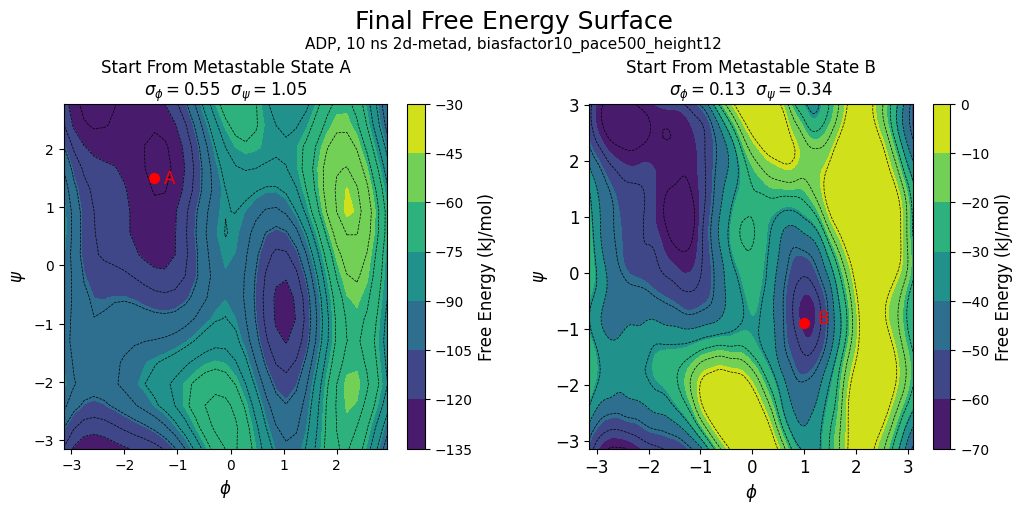

In [124]:
# figure 15 - 2d metad final fes
fig,axs=plt.subplots(1,2,figsize=(12,5))

# rearrange data_A, column 3, 17 columns, 33 rows, 17*33=561
fes_A=fes_final_topol_comparison[0][:,2].reshape(17,33)
# phi is first 33 rows of fes_final_topol_comparison
phi_A=fes_final_topol_comparison[0][:33,0]
# psi is every 33 rows of fes_final_topol_comparison
psi_A=fes_final_topol_comparison[0][::33,1]
# check data
#print (phi_A, psi_A)


# rearrange data_B, column 3, 53 columns, 137 rows, 53*137=7261
fes_B=fes_final_topol_comparison[1][:,2].reshape(53,137)
# phi is first 137 rows of fes_final_topol_comparison
phi_B=fes_final_topol_comparison[1][:137,0]
# psi is every 137 rows of fes_final_topol_comparison
psi_B=fes_final_topol_comparison[1][::137,1]
# check data
#print (phi_B, psi_B)

# metastable state A
axs[0].contourf(phi_A,psi_A,fes_A,cmap='viridis')
# labels fontsize 12
axs[0].set_xlabel('$\phi$',fontsize=12)
axs[0].set_ylabel('$\psi$',fontsize=12)
# title fontsize 12
axs[0].set_title('Start From Metastable State A\n'r'$\sigma_\phi=0.55\ \ \sigma_\psi=1.05$',fontsize=12)
# colorbar
cbar=fig.colorbar(axs[0].contourf(phi_A,psi_A,fes_A,cmap='viridis'),ax=axs[0])
cbar.ax.set_ylabel('Free Energy (kJ/mol)',fontsize=12)
# contour
axs[0].contour(phi_A,psi_A,fes_A,levels=10,colors='black',linewidths=0.5)
# set axis range
#axs[0].set_xlim(-np.pi,np.pi)
#axs[0].set_ylim(-np.pi,np.pi)
# label metastable state A
axs[0].scatter(-1.45,1.5,marker='o',color='red',s=50)
axs[0].text(-1.25,1.4,'A',fontsize=12, color='red')


# metastable state B
axs[1].contourf(phi_B,psi_B,fes_B,cmap='viridis')
# labels fontsize 12
axs[1].set_xlabel('$\phi$',fontsize=12)
axs[1].set_ylabel('$\psi$',fontsize=12)
# title fontsize 12
axs[1].set_title('Start From Metastable State B\n'r'$\sigma_\phi=0.13\ \ \sigma_\psi=0.34$',fontsize=12)
# colorbar
cbar=fig.colorbar(axs[1].contourf(phi_B,psi_B,fes_B,cmap='viridis'),ax=axs[1])
cbar.ax.set_ylabel('Free Energy (kJ/mol)',fontsize=12)
# contour
axs[1].contour(phi_B,psi_B,fes_B,levels=10,colors='black',linewidths=0.5)
# set axis range
#axs[1].set_xlim(-np.pi,np.pi)
#axs[1].set_ylim(-np.pi,np.pi)
# label metastable state B
axs[1].scatter(1.0,-0.9,marker='o',color='red',s=50)
axs[1].text(1.25,-0.9,'B',fontsize=12, color='red')


# two lines of title
plt.text(x=0.5, y=0.95, s="Final Free Energy Surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.91, s= "ADP, 10 ns 2d-metad, biasfactor10_pace500_height12", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# save figure as pdf in ../Figures
fname = '../Figures/fig15.[2d_metad_10ns_topolA_B]Final_Free_Engergy_Surface.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



In [128]:
# gif preparation - metastable state A

fig = plt.figure(figsize=(6,5))

# data processing
fes_As=np.empty((6), dtype=object)
phi_As=np.empty((6), dtype=object)
psi_As=np.empty((6), dtype=object)
time=['0.1 ns','0.3 ns','1.0 ns','2.0 ns','5.0 ns','10.0 ns']

# plot
for i in range(6):
    fes_As[i]=fes_stride_topol_comparison[0][i][:,2].reshape(17,33)
    phi_As[i]=fes_stride_topol_comparison[0][i][:33,0]
    psi_As[i]=fes_stride_topol_comparison[0][i][::33,1]
    # contourf
    plt.contourf(phi_As[i],psi_As[i],fes_As[i],cmap='viridis')
    # labels fontsize 12
    plt.xlabel('$\phi$',fontsize=12)
    plt.ylabel('$\psi$',fontsize=12)
    # title fontsize 12
    plt.title('Start From Metastable State A\n'r'$\sigma_\phi=0.55\ \ \sigma_\psi=1.05$''\nt = '+time[i],fontsize=12)
    # colorbar
    cbar=fig.colorbar(plt.contourf(phi_As[i],psi_As[i],fes_As[i],cmap='viridis'))
    cbar.ax.set_ylabel('Free Energy (kJ/mol)',fontsize=12)
    # contour
    plt.contour(phi_As[i],psi_As[i],fes_As[i],levels=10,colors='black',linewidths=0.5)
    # set axis range
    #plt.xlim(-np.pi,np.pi)
    #plt.ylim(-np.pi,np.pi)
    # label metastable state A
    plt.scatter(-1.45,1.5,marker='o',color='red',s=50)
    plt.text(-1.25,1.4,'A',fontsize=12, color='red')
    # save figure as tif in ../Figures/gif_preparation
    fname = '../Figures/gif_preparation/tif.[2d_metad_10ns_topolA]Free_Engergy_Surface_A_'+time[i]+'.tif'
    plt.savefig(fname, format='tif', dpi=200, bbox_inches='tight')
    plt.clf()
    i += 1



<Figure size 600x500 with 0 Axes>

In [129]:
# gif preparation - metastable state B

fig = plt.figure(figsize=(6,5))

# data processing
fes_Bs=np.empty((6), dtype=object)
phi_Bs=np.empty((6), dtype=object)
psi_Bs=np.empty((6), dtype=object)
time=['0.1 ns','0.3 ns','1.0 ns','2.0 ns','5.0 ns','10.0 ns']

# plot
for i in range(6):
    fes_As[i]=fes_stride_topol_comparison[1][i][:,2].reshape(53,137)
    phi_As[i]=fes_stride_topol_comparison[1][i][:137,0]
    psi_As[i]=fes_stride_topol_comparison[1][i][::137,1]
    # contourf
    plt.contourf(phi_As[i],psi_As[i],fes_As[i],cmap='viridis')
    # labels fontsize 12
    plt.xlabel('$\phi$',fontsize=12)
    plt.ylabel('$\psi$',fontsize=12)
    # title fontsize 12
    plt.title('Start From Metastable State B\n'r'$\sigma_\phi=0.13\ \ \sigma_\psi=0.34$''\nt = '+time[i],fontsize=12)
    # colorbar
    cbar=fig.colorbar(plt.contourf(phi_As[i],psi_As[i],fes_As[i],cmap='viridis'))
    cbar.ax.set_ylabel('Free Energy (kJ/mol)',fontsize=12)
    # contour
    plt.contour(phi_As[i],psi_As[i],fes_As[i],levels=10,colors='black',linewidths=0.5)
    # set axis range
    #plt.xlim(-np.pi,np.pi)
    #plt.ylim(-np.pi,np.pi)
    # label metastable state B
    plt.scatter(1.0,-0.9,marker='o',color='red',s=50)
    plt.text(1.25,-0.9,'B',fontsize=12, color='red')
    # save figure as tif in ../Figures/gif_preparation
    fname = '../Figures/gif_preparation/tif.[2d_metad_10ns_topolA]Free_Engergy_Surface_B_'+time[i]+'.tif'
    plt.savefig(fname, format='tif', dpi=200, bbox_inches='tight')
    plt.clf()
    i += 1







<Figure size 600x500 with 0 Axes>